<a href="https://colab.research.google.com/github/Shaurya0108/cs4372/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
bike_sharing = fetch_ucirepo(id=275)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# Loading data

## Load and preprocess data

In [ ]:
# url = "https://utdallas.box.com/s/txm5gcuu6h7kxb94is3w4b6lq48p6r61v"

df=pd.read_csv('day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.shape

(731, 16)

In [ ]:
df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
df.shape,df.drop_duplicates().shape

((731, 16), (731, 16))

# Cleaning Data

In [ ]:
df.drop(['dteday', 'instant'], axis = 1, inplace= True)

In [ ]:
df.drop(['holiday'], axis = 1, inplace = True)

In [ ]:
season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
df['season'] = df['season'].map(season_codes)

In [ ]:
df.season.value_counts()

,count
season,
fall,188
summer,184
spring,181
winter,178


In [ ]:
weathersit_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
df['weathersit'] = df['weathersit'].map(weathersit_codes)

In [ ]:
df['weathersit'].value_counts()

,count
weathersit,
Clear,463
Mist,247
Light Snow,21


In [ ]:
month_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].map(month_codes)

In [ ]:
df['mnth'].value_counts()

,count
mnth,
Jan,62
Mar,62
May,62
July,62
Aug,62
Oct,62
Dec,62
Apr,60
June,60


In [ ]:
weekday_codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['weekday'] = df['weekday'].map(weekday_codes)

In [ ]:
yr_codes = {0:"2018",1:"2019"}
df['yr'] = df['yr'].map(yr_codes)

In [ ]:
df.head(2)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,Sun,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,spring,2018,Jan,Mon,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801


In [ ]:
cont_col =[ 'temp','atemp','hum','windspeed']

cat_col =['season','yr','mnth','weekday','workingday','weathersit']

tg = ['cnt']

len(cont_col) + len(cat_col) + len(tg)

11

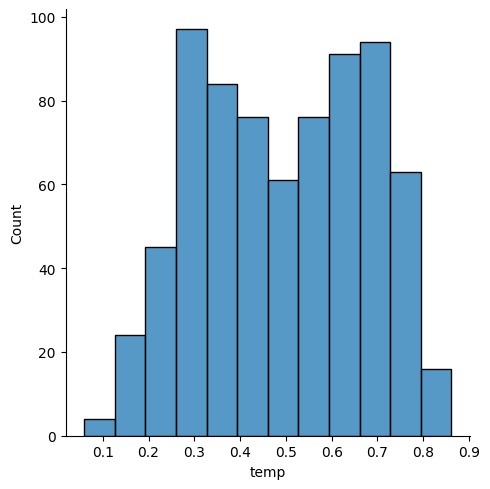

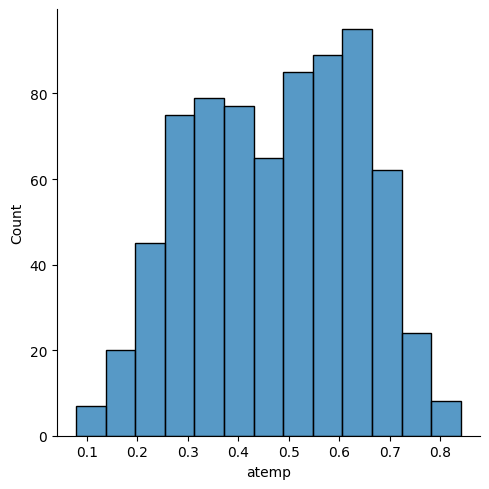

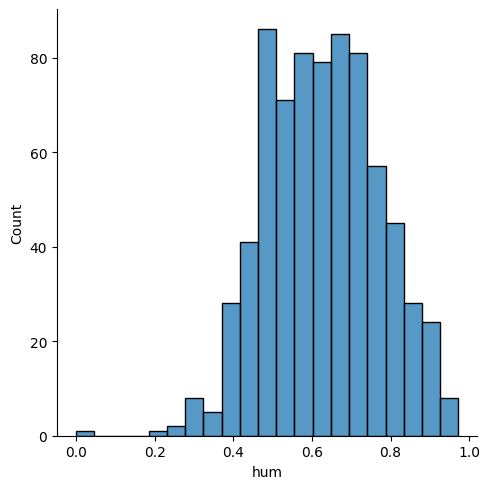

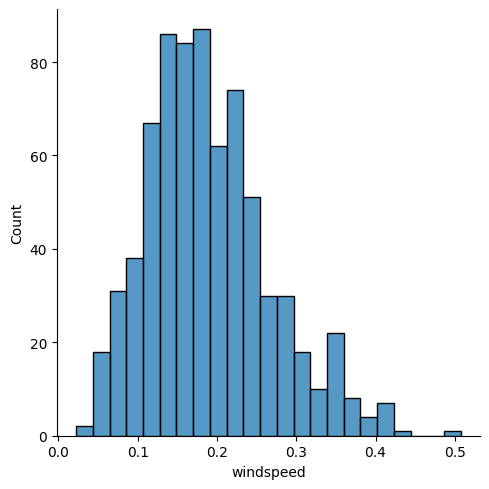

In [ ]:
for i in cont_col:
    sns.displot(df[i])
    plt.show()

In [ ]:
print(df.describe())

       workingday        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.183051    0.162961    0.142429    0.077498   
min      0.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
ma

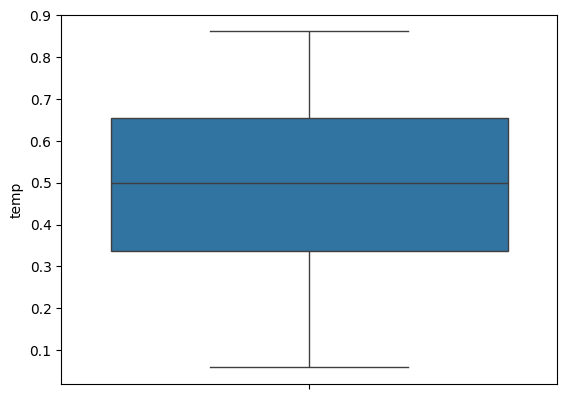

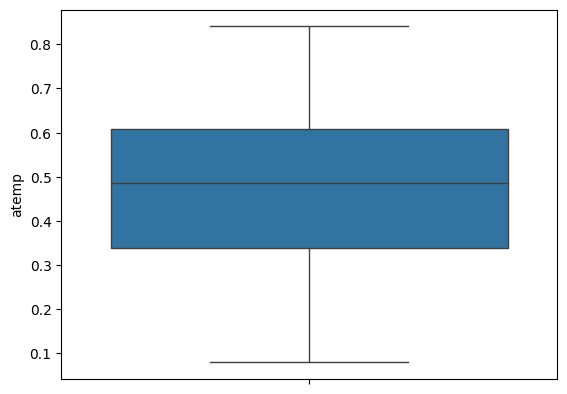

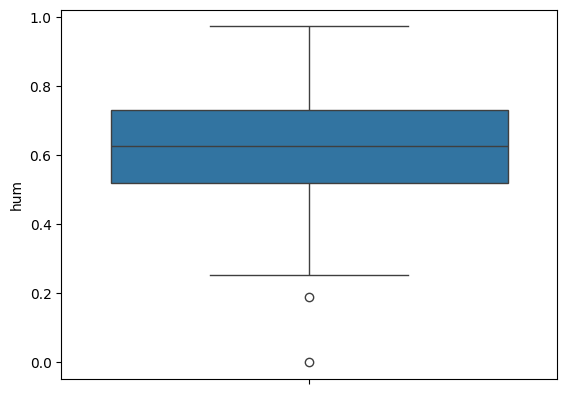

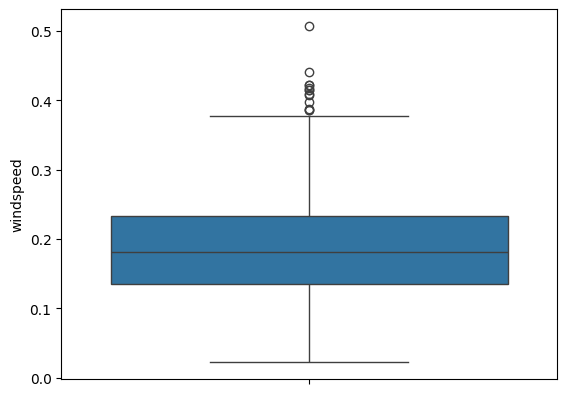

In [ ]:
for i in cont_col:
    sns.boxplot(df[i])
    plt.show()

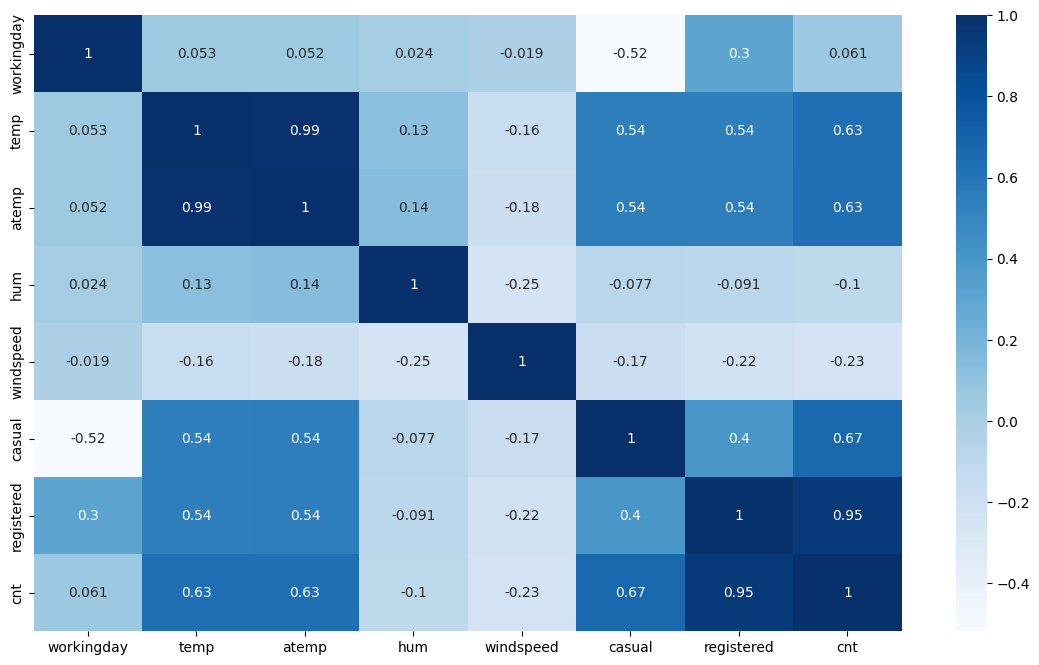

In [ ]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
df.drop(['atemp'], axis = 1, inplace = True)

In [ ]:
df.drop(['registered', 'casual'], axis = 1, inplace = True)

## Pre process the dataset

In [ ]:
year = {'2018':0,'2019':1}
df['yr'] = df['yr'].map(year)
df['yr'].value_counts()

,count
yr,
1,366
0,365


In [ ]:
df.head(2)

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Sun,0,Mist,0.344167,0.805833,0.160446,985
1,spring,0,Jan,Mon,0,Mist,0.363478,0.696087,0.248539,801


In [ ]:
cat_col = ['season','yr','weekday','mnth','workingday','weathersit']
df[cat_col].nunique()

,0
season,4
yr,2
weekday,7
mnth,12
workingday,2
weathersit,3


In [ ]:
dummy = pd.get_dummies(df[['season','weekday','mnth', 'weathersit']], drop_first = True)
df = pd.concat([df,dummy], axis = 1)
df.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,Sun,0,Mist,0.344167,0.805833,0.160446,985,...,True,False,False,False,False,False,False,False,False,True
1,spring,0,Jan,Mon,0,Mist,0.363478,0.696087,0.248539,801,...,True,False,False,False,False,False,False,False,False,True
2,spring,0,Jan,Tue,1,Clear,0.196364,0.437273,0.248309,1349,...,True,False,False,False,False,False,False,False,False,False
3,spring,0,Jan,Wed,1,Clear,0.200000,0.590435,0.160296,1562,...,True,False,False,False,False,False,False,False,False,False
4,spring,0,Jan,Thu,1,Clear,0.226957,0.436957,0.186900,1600,...,True,False,False,False,False,False,False,False,False,False
5,spring,0,Jan,Fri,1,Clear,0.204348,0.518261,0.089565,1606,...,True,False,False,False,False,False,False,False,False,False
6,spring,0,Jan,Sat,1,Mist,0.196522,0.498696,0.168726,1510,...,True,False,False,False,False,False,False,False,False,True
7,spring,0,Jan,Sun,0,Mist,0.165000,0.535833,0.266804,959,...,True,False,False,False,False,False,False,False,False,True
8,spring,0,Jan,Mon,0,Clear,0.138333,0.434167,0.361950,822,...,True,False,False,False,False,False,False,False,False,False
9,spring,0,Jan,Tue,1,Clear,0.150833,0.482917,0.223267,1321,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)
df.head(2)

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Light Snow,weathersit_Mist
0,0,0,0.344167,0.805833,0.160446,985,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.696087,0.248539,801,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True


# Test and train

In [ ]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SGDRegressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.001, learning_rate='adaptive', eta0=0.01, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, learning_rate='adaptive', random_state=42)

In [ ]:
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

In [ ]:
train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

In [ ]:
print("SGDRegressor Results:")
print(f"Training MSE: {train_mse_sgd}")
print(f"Test MSE: {test_mse_sgd}")
print(f"Training R2: {train_r2_sgd}")
print(f"Test R2: {test_r2_sgd}")

SGDRegressor Results:
Training MSE: 562071.8276257666
Test MSE: 636130.2299792253
Training R2: 0.8466673240885481
Test R2: 0.8413593756130068


In [ ]:
# OLS model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [ ]:
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

In [ ]:
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          1.40e-206
Time:                        04:51:55   Log-Likelihood:                -4694.5
No. Observations:                 584   AIC:                             9445.
Df Residuals:                     556   BIC:                             9567.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2274.96

In [ ]:
y_train_pred_ols = ols_model.predict(X_train_sm)
y_test_pred_ols = ols_model.predict(X_test_sm)

In [ ]:
train_mse_ols = mean_squared_error(y_train, y_train_pred_ols)
test_mse_ols = mean_squared_error(y_test, y_test_pred_ols)
train_r2_ols = r2_score(y_train, y_train_pred_ols)
test_r2_ols = r2_score(y_test, y_test_pred_ols)

In [ ]:
print("OLS Results:")
print(f"Training MSE: {train_mse_ols}")
print(f"Test MSE: {test_mse_ols}")
print(f"Training R2: {train_r2_ols}")
print(f"Test R2: {test_r2_ols}")

OLS Results:
Training MSE: 562033.534451114
Test MSE: 637272.2338858981
Training R2: 0.8466777704312574
Test R2: 0.8410745782487739


In [ ]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'SGDRegressor: Actual vs Predicted')

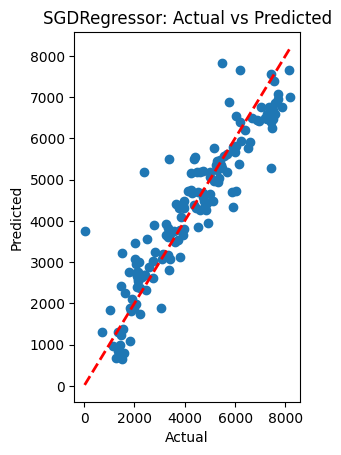

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_sgd)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SGDRegressor: Actual vs Predicted')

Text(0.5, 1.0, 'OLS: Actual vs Predicted')

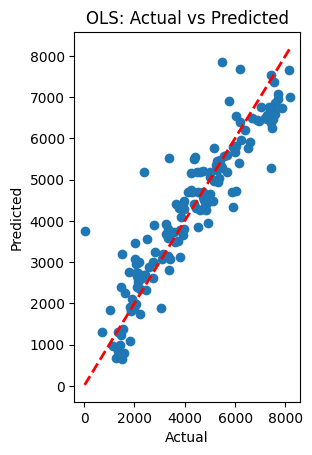

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ols)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS: Actual vs Predicted')